In [23]:
import pandas as pd
import matplotlib as plt

# Louisville Metro Police Department Bias Study 

| item | Meaning |
| -- | -- |
| stops | Cleaned dataframe of police citations |
| LMPD | Cleaned dataframe of police Department |
| x| x |

### things to do next 
- add api calls where it merges all the years 
- adjust the function so that it is callable by year 
- replot old plots 
- clean up the % section 

# Cleaning Functions 

In [24]:
def stops_cleaning():
    stops = pd.read_csv('stops.csv')
    stops.drop(columns=['CITATION_CONTROL_NUMBER', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId'], inplace=True)
    stops.rename(columns={'TYPE_OF_STOP':'stop', 'ACTIVITY_RESULTS':'action', 'OFFICER_GENDER':'o_gender', 'OFFICER_RACE':"o_race", 'OFFICER_AGE_RANGE':"o_age", 'DRIVER_GENDER':'d_gender', 'DRIVER_RACE':"d_race", 'DRIVER_AGE_RANGE':"d_age"}, inplace=True)
    stops['o_race'] = stops['o_race'].replace(['UNKNOWN'], ' ')
    stops.drop(stops.loc[stops['o_race']==' '].index, inplace=True)
    stops.sort_values(by=['o_race'], inplace=True)
    return stops

stops = stops_cleaning()

In [25]:
def LMPD_cleaning():
    LMPD = pd.read_csv (r'employee.csv')
    LMPD.drop(columns=['AOC_CODE', 'RANK_TITLE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'], inplace=True)
    LMPD.rename(columns={'OFFICER_SEX':'oh_sex', 'OFFICER_RACE':'oh_race', 'OFFICER_AGE_RANGE':'oh_age_range', 'OFFICER_AGE':"oh_age"}, inplace=True)
    LMPD.drop(LMPD.loc[LMPD['oh_age']==0].index, inplace=True)
    LMPD.sort_values(by=['oh_age'], inplace=True)
    LMPD['oh_race'] = LMPD['oh_race'].replace(['U '], ' ')
    LMPD.drop(LMPD.loc[LMPD['oh_race']==' '].index, inplace=True)
    LMPD.sort_values(by=['oh_race'], inplace=True)
    return LMPD

LMPD = LMPD_cleaning()

In [26]:
stops.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age
3260,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,F,BLACK,20 - 25
15448,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,F,WHITE,51 - 60
647,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,M,BLACK,26 - 30
4721,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,21 - 30,M,WHITE,26 - 30
3458,TRAFFIC VIOLATION,CITATION ISSUED,M,ASIAN,31 - 40,F,WHITE,26 - 30


In [27]:
LMPD.head()

,oh_sex,oh_race,oh_age_range,oh_age
1790,M,A,30 - 39,35
2161,M,A,21 - 29,27
2560,M,A,30 - 39,37
1460,M,A,50 - 59,53
2138,M,A,30 - 39,33


# Plots 

<Axes: ylabel='count'>

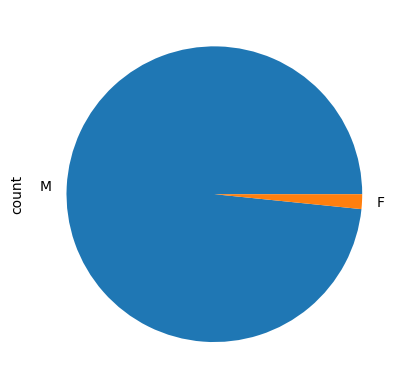

In [31]:
stops['o_gender'].value_counts().plot.pie()

<Axes: ylabel='count'>

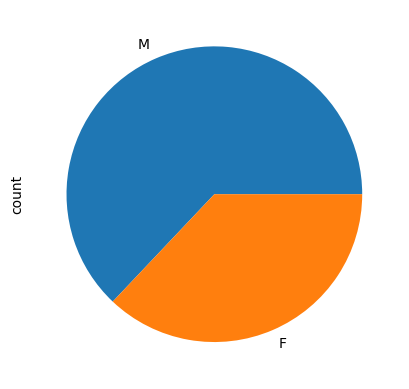

In [32]:
stops['d_gender'].value_counts().plot.pie()

<Axes: ylabel='count'>

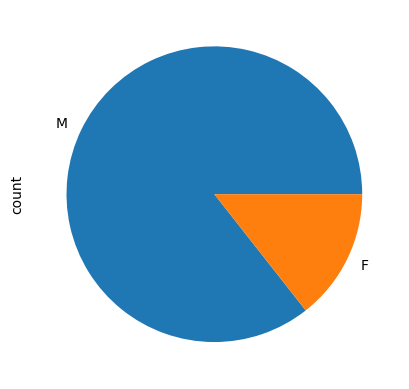

In [33]:
LMPD['oh_sex'].value_counts().plot.pie()